<a href="https://colab.research.google.com/github/Noam-shahar/AI-course/blob/main/HW3_Fashion_MNIST_Dataset_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4988 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3771 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3384 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3135 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2936 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2814 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2676 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2577 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2473 - accuracy: 0.9072
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3371

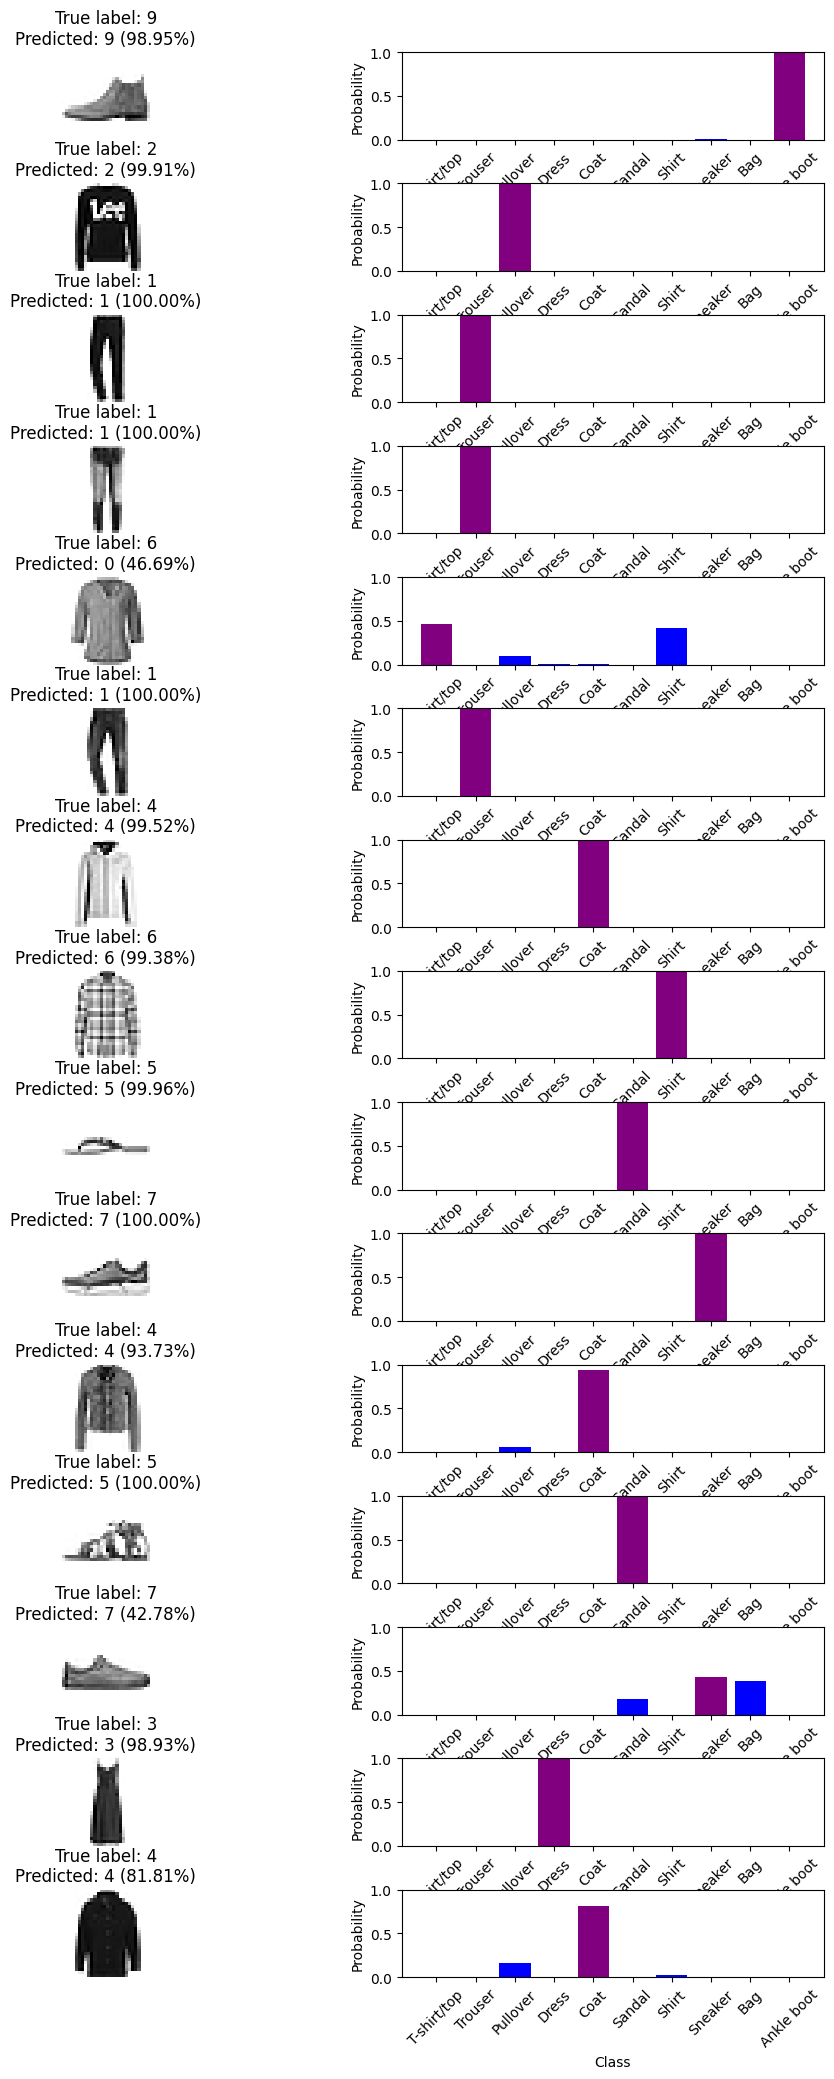

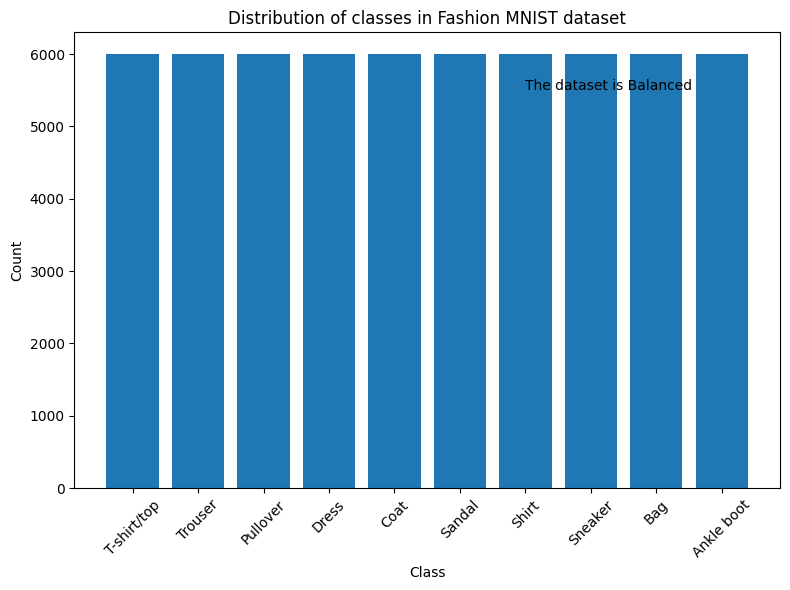

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define and compile the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(train_images, train_labels, epochs=10)

# Display a few images from the dataset with their predicted probabilities
num_samples = 15

plt.figure(figsize=(12, 25))  # Adjust the figure size to increase the height of the plot
for i in range(num_samples):
    # Predict on a test image
    predictions = model.predict(np.expand_dims(test_images[i], axis=0))

    # Get predicted class probabilities and class label
    predicted_label = np.argmax(predictions)
    predicted_probabilities = predictions[0]

    plt.subplot(num_samples, 2, 2 * i + 1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(f"True label: {test_labels[i]}\nPredicted: {predicted_label} ({100*np.max(predicted_probabilities):.2f}%)")
    plt.subplots_adjust(hspace=0.5)

    plt.subplot(num_samples, 2, 2 * i + 2)
    plt.bar(np.arange(len(predicted_probabilities)), predicted_probabilities, color='blue')
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.xticks(np.arange(len(predicted_probabilities)), class_names, rotation=45)
    plt.ylim([0, 1])
    plt.subplots_adjust(hspace=0.5)

    # Highlight the bar with the highest probability in purple
    plt.bar(np.argmax(predicted_probabilities), np.max(predicted_probabilities), color='purple')

# Display test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Count the occurrences of each label in the training set
label_counts = np.bincount(train_labels)

# Create a separate plot to visualize the distribution of classes and check if the dataset is balanced
plt.figure(figsize=(8, 6))
plt.bar(class_names, label_counts)
plt.title('Distribution of classes in Fashion MNIST dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Check if the dataset is balanced
is_balanced = "Balanced" if min(label_counts) / max(label_counts) > 0.8 else "Imbalanced"
plt.text(6, 5500, f"The dataset is {is_balanced}", fontsize=10, color='black')

plt.tight_layout()
plt.show()
